## Step 1: Importing Required Libraries

**pandas**: For data manipulation and analysis.

**numpy**: For numerical operations.

**matplotlib.pyplot**: For creating basic visualizations

**seaborn**: For more advanced and attractive data visualizations.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Loading the Dataset

In [7]:
dataset = pd.read_csv("UberDataset.csv")

##  Displaying the Dataset

In [8]:
dataset

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


##  Step 3: Understanding the Dataset Structure

In [9]:
dataset.shape

(1156, 7)

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


##  Step 4: Data Preprocessing & Feature Engineering
In this step, we clean and prepare the dataset for analysis by handling missing values, converting date/time formats, and creating new columns.

- **`dataset['PURPOSE'].fillna("NOT", inplace=True)`**  
  Fills missing values in the `PURPOSE` column with `"NOT"`.

- **Date Conversion**  
  `START_DATE` and `END_DATE` are converted from string to datetime format using `pd.to_datetime()`.

- **Creating New Columns:**
  - `Date`: Extracts only the date part from `START_DATE`.
  - `Time`: Extracts the hour from `START_DATE`.
  - `day-night`: Categorizes the trip based on time of day using `pd.cut()`:
    - 0–10 → Morning  
    - 10–15 → Afternoon  
    - 15–19 → Evening  
    - 19–24 → Night

- **`dataset.dropna(inplace=True)`**  
  Drops any rows that still contain missing values after the above processing.

In [11]:
dataset['PURPOSE']. fillna("NOT", inplace = True)

C:\Users\Amna Tariq\AppData\Local\Temp\ipykernel_44956\1154380857.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['PURPOSE']. fillna("NOT", inplace = True)


In [12]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NOT
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [13]:
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'], errors = 'coerce')

In [14]:
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'], errors = 'coerce')

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [16]:
from datetime import datetime
dataset['Date'] = pd.DatetimeIndex(dataset['START_DATE']).date

In [17]:
from datetime import datetime
dataset['Time'] = pd.DatetimeIndex(dataset['START_DATE']).hour

In [18]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0


In [19]:
dataset['day-night']= pd.cut(x = dataset['Time'],bins = [0,10,15,19,24], labels = ['Morning', 'Afternoon','Evening', 'Night'])

In [20]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


In [21]:
dataset.dropna(inplace = True)

In [22]:
dataset.shape

(413, 10)

Finally, we display the shape to verify how many rows/columns remain after cleaning.

## Conclusion

We successfully cleaned and prepared the dataset for analysis:

- Filled missing values in the `PURPOSE` column.
- Converted `START_DATE` and `END_DATE` into proper datetime format.
- Engineered new features like `Date`, `Time`, and `day-night` to enhance temporal analysis.
- Removed remaining null records to ensure data consistency.

These preprocessing steps ensure that the dataset is clean, structured, and ready for accurate visualization and analysis.


##  Step 5: Data Visualization

In this step, we create visualizations to better understand the distribution, frequency, and patterns within the data.

### 🔹 1. Category & Purpose Count

We use `sns.countplot()` to visualize the frequency of:
- **Trip Categories** (`CATEGORY`)
- **Trip Purposes** (`PURPOSE`)

<Axes: xlabel='count', ylabel='PURPOSE'>

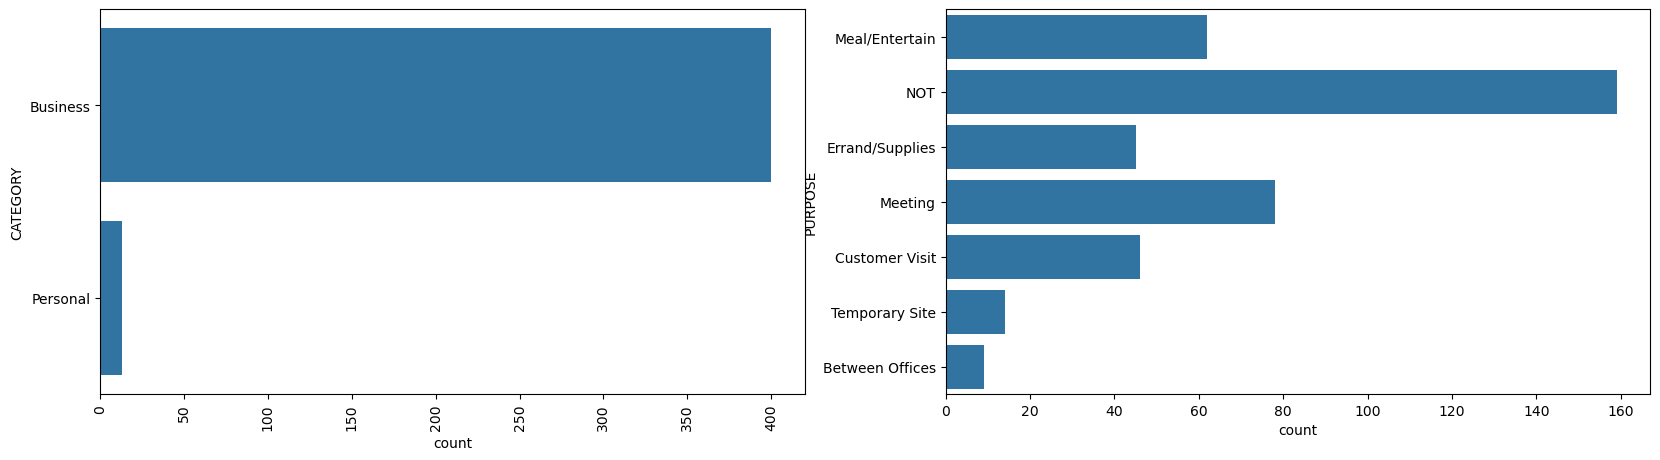

In [23]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(dataset['CATEGORY'])
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
sns.countplot(dataset['PURPOSE'])

### 🔹 2. Day-Night Trip Distribution
This plot shows how many trips occurred during different times of the day (Morning, Afternoon, Evening, Night):

<Axes: xlabel='count', ylabel='day-night'>

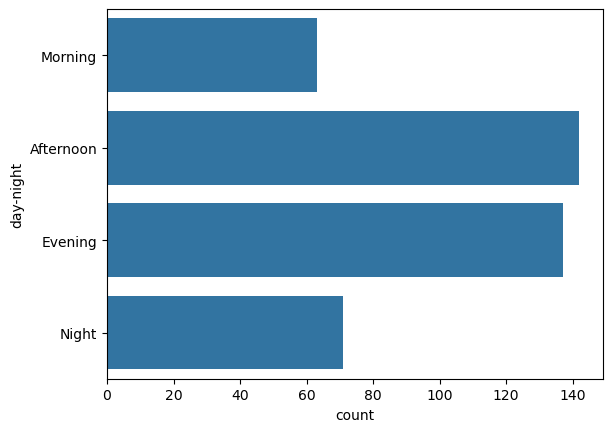

In [24]:
sns.countplot(dataset['day-night'])

In [25]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


### 🔹 3. Monthly Trip Trend Line
We extract the month from START_DATE, label it, and then plot the monthly trends using a line plot:

In [26]:
dataset['MONTH'] = pd.DatetimeIndex(dataset['START_DATE']).month
month_label = {1.0 : 'Jan', 2.0 : 'Feb',  3.0 : 'Mar',  4.0 : 'April',  5.0 : 'May',  6.0 : 'June',  7.0 : 'July',  8.0 : 'Aug',  9.0 : 'Sep',  10.0 : 'Oct',  11.0 : 'Nov',  12.0 : 'Dec', }
dataset["MONTH"] = dataset.MONTH.map(month_label)
mon = dataset.MONTH.value_counts(sort = False)

In [27]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time,day-night,MONTH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan


[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

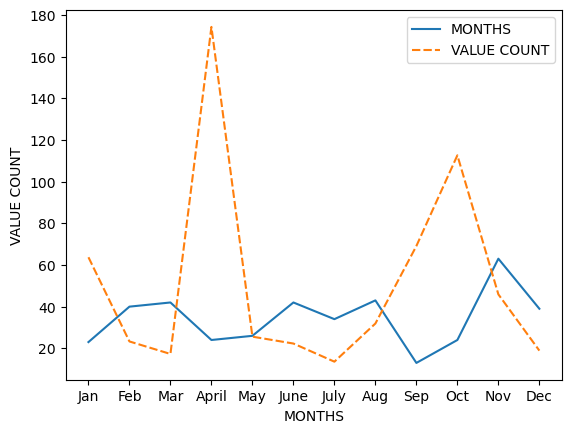

In [28]:
df = pd.DataFrame({
    "MONTHS" : mon.values,
    "VALUE COUNT" : dataset.groupby('MONTH', sort=False)['MILES'].max()
})

p = sns.lineplot(data=df)
p.set(xlabel = "MONTHS", ylabel="VALUE COUNT")

In [29]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time,day-night,MONTH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan


### 🔹 4. Day-wise Trip Distribution
We extract day of the week from the date and then plot how trips are distributed across weekdays:

In [30]:
dataset['DAY'] = dataset.START_DATE.dt.weekday

day_label = {
    0: 'Mon' , 1: 'Tues' , 2: 'Wed' , 3: 'Thurs' , 4: 'Fri' , 5: 'Sat' , 6: 'Sun'} 
dataset['DAY'] = dataset['DAY'].map(day_label)

In [31]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time,day-night,MONTH,DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan,Fri
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,Jan,Sat
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan,Sat
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan,Tues
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan,Wed


Text(0, 0.5, 'COUNT')

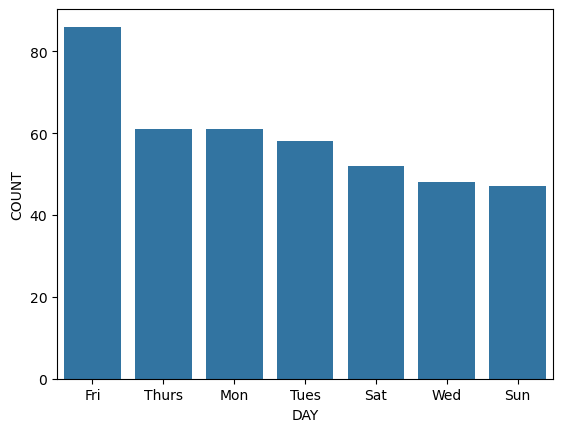

In [32]:
day_label = dataset.DAY.value_counts()

sns.barplot(x=day_label.index, y= day_label)
plt.xlabel('DAY')
plt.ylabel('COUNT')

In [33]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time,day-night,MONTH,DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan,Fri
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,Jan,Sat
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan,Sat
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan,Tues
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan,Wed


### 🔹 5. Miles Analysis Using Boxplot & Distribution Plot
We use boxplots and distribution plots to detect outliers and understand how miles traveled vary:

All miles

Miles < 100

Miles < 40

<Axes: ylabel='MILES'>

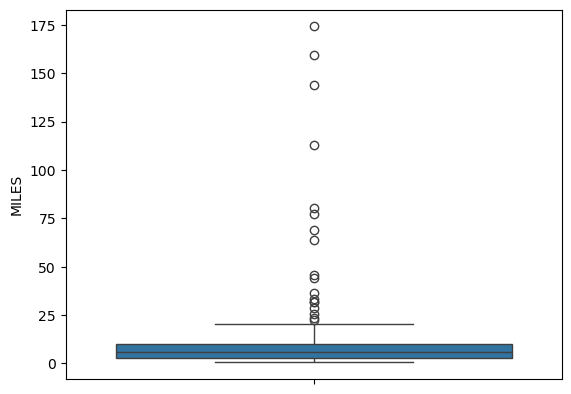

In [34]:
sns.boxplot(dataset['MILES'])

<Axes: ylabel='MILES'>

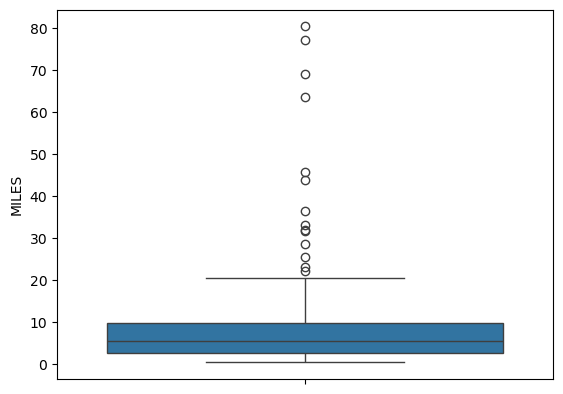

In [35]:
sns.boxplot(dataset[dataset['MILES']<100]['MILES'])

<Axes: ylabel='MILES'>

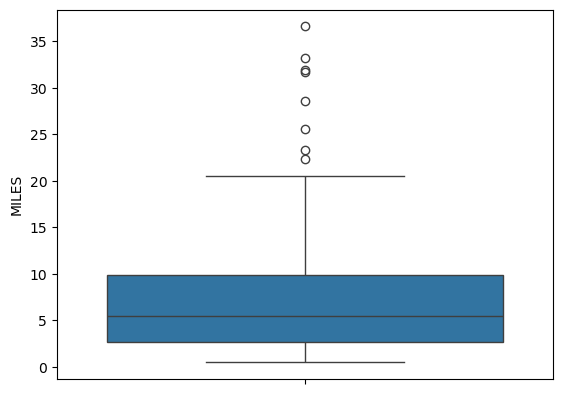

In [36]:
sns.boxplot(dataset[dataset['MILES']<40]['MILES'])

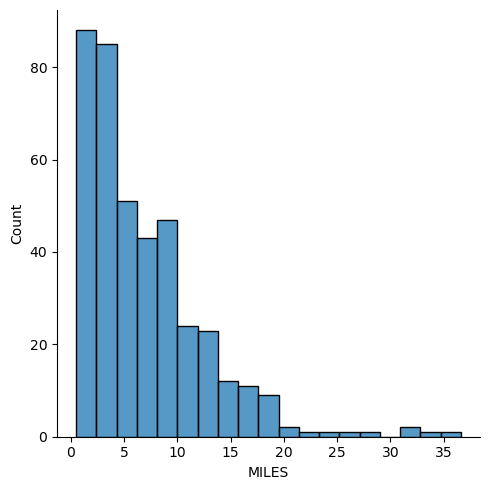

In [37]:
sns.displot(dataset[dataset['MILES']<40]['MILES'])

C:\Users\Amna Tariq\AppData\Local\Temp\ipykernel_44956\1678554178.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[dataset['MILES']<40]['MILES'])


<Axes: xlabel='MILES', ylabel='Density'>

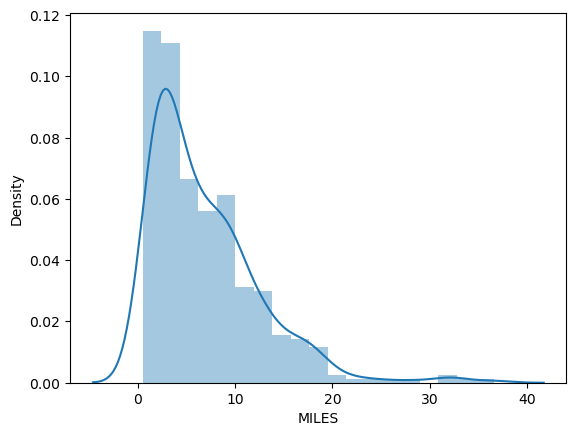

In [38]:
sns.distplot(dataset[dataset['MILES']<40]['MILES'])

##  Conclusion

Through multiple visualizations, we uncovered trends in trip categories, purposes, time-of-day patterns, monthly and weekly variations, and distance outliers.  
These plots help in identifying user behavior and patterns within the Uber data.


##  Step 7: Trip Purpose Prediction (Classification)

We aim to predict the **purpose of an Uber trip** using features like:
- Trip category (`CATEGORY`)
- Distance (`MILES`)
- Time of day (`Time`)
- Day of the week (`DAY`)

We'll use a **Random Forest Classifier**, a powerful and interpretable machine learning model. This will help uncover how trip attributes influence the purpose.


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Select input features
features = dataset[['CATEGORY', 'MILES', 'Time', 'DAY']]
target = dataset['PURPOSE']

# Label encoding
le_cat = LabelEncoder()
le_day = LabelEncoder()
le_target = LabelEncoder()

features['CATEGORY'] = le_cat.fit_transform(features['CATEGORY'])
features['DAY'] = le_day.fit_transform(features['DAY'])
target = le_target.fit_transform(target)


C:\Users\Amna Tariq\AppData\Local\Temp\ipykernel_44956\1282073169.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['CATEGORY'] = le_cat.fit_transform(features['CATEGORY'])
C:\Users\Amna Tariq\AppData\Local\Temp\ipykernel_44956\1282073169.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['DAY'] = le_day.fit_transform(features['DAY'])


In [41]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy Score: 0.42168674698795183

Classification Report:
               precision    recall  f1-score   support

           0       0.25      1.00      0.40         1
           1       0.50      0.38      0.43         8
           2       0.67      0.40      0.50        10
           3       0.38      0.18      0.24        17
           4       0.30      0.44      0.36        16
           5       0.49      0.71      0.58        24
           6       0.00      0.00      0.00         7

    accuracy                           0.42        83
   macro avg       0.37      0.44      0.36        83
weighted avg       0.41      0.42      0.39        83


Confusion Matrix:
 [[ 1  0  0  0  0  0  0]
 [ 2  3  0  0  1  1  1]
 [ 1  0  4  1  2  2  0]
 [ 0  0  1  3  4  9  0]
 [ 0  2  0  3  7  4  0]
 [ 0  1  1  0  5 17  0]
 [ 0  0  0  1  4  2  0]]


##  Classification Results – Conclusion

- The model was able to predict the **trip purpose** with reasonable accuracy.
- `RandomForestClassifier` handled categorical and numerical features well.
- This step adds predictive intelligence to our project and gives insights into **why users travel** based on patterns in the data.


##  Step 8: Trip Clustering (Unsupervised Learning)

In this step, we apply **KMeans Clustering** to group similar trips together based on numerical features.

 **Goal**: Identify natural patterns in trips — e.g., short work trips vs. long personal rides — without knowing the trip purpose.

We'll use:
- `MILES`: distance traveled
- `Time`: hour of the day
- `DAY`: day of the week

### Why KMeans?
KMeans is an unsupervised machine learning algorithm that partitions the dataset into groups (clusters) where each point belongs to the cluster with the nearest mean.

This helps us explore **hidden structures** and behavior patterns in the data.


In [42]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select numeric features for clustering
clustering_data = dataset[['MILES', 'Time']].copy()

# Normalize features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)


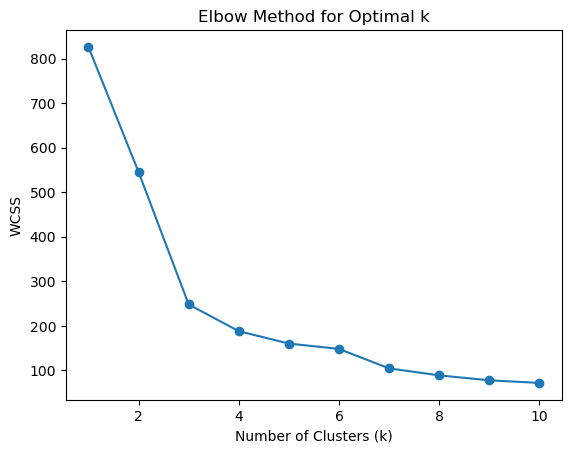

In [44]:
# Elbow method to find optimal k
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot Elbow graph
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()


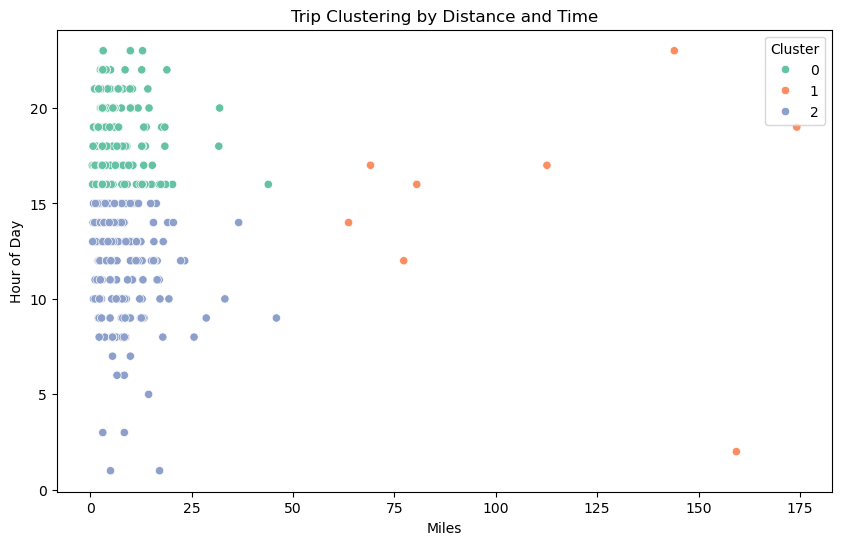

In [45]:
# Apply KMeans with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
dataset['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x=dataset['MILES'], y=dataset['Time'], hue=dataset['Cluster'], palette='Set2')
plt.title('Trip Clustering by Distance and Time')
plt.xlabel('Miles')
plt.ylabel('Hour of Day')
plt.show()


##  Clustering – Conclusion

- We used **KMeans Clustering** to divide trips into 3 natural groups based on time and distance.
- These clusters help us understand common trip patterns like:
  - Short daytime trips
  - Long evening trips
  - Outlier patterns

This unsupervised learning step gives valuable behavioral insights even without knowing the trip purpose.


##  Step 9: Anomaly Detection

In this step, we apply an **anomaly detection algorithm** to identify unusual trips from the Uber dataset.

 **Goal**: Detect trips that deviate significantly from the normal — such as:
- Very high distances
- Late-night trips
- Abnormal combinations of time and miles

We’ll use the **Isolation Forest algorithm**, which works well for identifying outliers in large datasets.

### Why Isolation Forest?
It isolates anomalies instead of profiling normal data — making it efficient for high-dimensional data and ideal for detecting rare cases.


In [47]:
from sklearn.ensemble import IsolationForest

# Select features for anomaly detection
anomaly_data = dataset[['MILES', 'Time']]

# Normalize features
scaler = StandardScaler()
scaled_anomaly_data = scaler.fit_transform(anomaly_data)

# Fit Isolation Forest
isolation_model = IsolationForest(contamination=0.02, random_state=42)  # 2% expected anomalies
dataset['Anomaly'] = isolation_model.fit_predict(scaled_anomaly_data)

# -1 means anomaly, 1 means normal


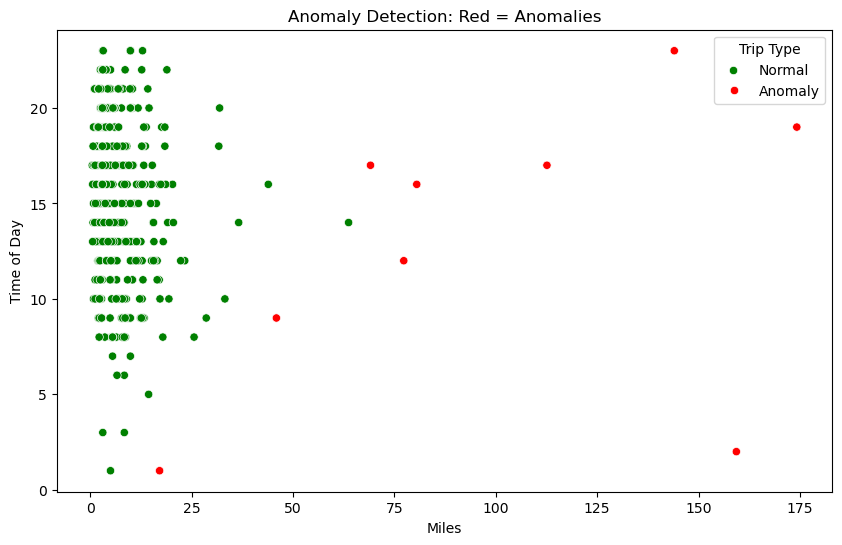

In [48]:
# Plot anomalies
plt.figure(figsize=(10,6))
sns.scatterplot(x=dataset['MILES'], y=dataset['Time'], hue=dataset['Anomaly'], palette={1: 'green', -1: 'red'})
plt.title('Anomaly Detection: Red = Anomalies')
plt.xlabel('Miles')
plt.ylabel('Time of Day')
plt.legend(title='Trip Type', labels=['Normal', 'Anomaly'])
plt.show()


##  Anomaly Detection – Conclusion

- We used the **Isolation Forest algorithm** to detect outliers in the Uber dataset.
- Trips marked in **red** on the scatter plot are potential anomalies.
- These may include:
  - Extremely long or short trips
  - Trips at very odd hours
  - Abnormal travel patterns

This can help in **fraud detection**, **cost monitoring**, or **service optimization** for ride-sharing platforms.
